SVD 구현  
해당 SVD 에서는 각 유저 별 평균 레이팅을 기반으로 SVD 한다

참고 : https://walwalgabu.tistory.com/entry/1-Numpy%EB%A7%8C-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-SVD-%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C%EC%9D%84-%EA%B0%84%EB%8B%A8%ED%9E%88-%EC%8B%A4%ED%97%98%ED%95%B4%EB%B3%B4%EC%9E%90Truncated-SVD


## 1. 데이터 Load

In [1]:
import pandas as pd
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [33]:
# 80000row
user_train = pd.read_csv('ml-100k_GRS/u1.base', sep='\t',names=["userID","itemID","rating","timestamp"],header=None, na_filter=False)
user_train = user_train[['userID','itemID','rating']]

## u1.base 각 유저가 각 아이템에 준 각 별점


# 100000row
user_total = pd.read_csv('ml-100k_GRS/u.data', sep='\t',names=["userID","itemID","rating","timestamp"],header=None, na_filter=False)
user_total = user_total[['userID','itemID','rating']]

# 20000row
user_test = pd.read_csv('ml-100k_GRS/u1.test', sep='\t',names=["userID","itemID","rating","timestamp"],header=None, na_filter=False)
user_test = user_test[['userID','itemID','rating']]


## 943명이 1682개를 1~5로 평균냄

In [36]:
user_total

,userID,itemID,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [29]:

# 0 ~ 1사이의 범위로 평점 데이터를 표준화 min:1 max:5
'''
min_max_scaler = MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(user_train[['rating']])
user_train[['rating']] = x_scaled

x_scaled = min_max_scaler.fit_transform(user_total[['rating']])
user_total[['rating']] = x_scaled

x_scaled = min_max_scaler.fit_transform(user_test [['rating']])
user_test [['rating']] = x_scaled
'''

In [30]:
#user_total
# 0, 25, 50, 75, 1, 의 값으로 변환된다.

,userID,itemID,rating
0,196,242,0.50
1,186,302,0.50
2,22,377,0.00
3,244,51,0.25
4,166,346,0.00
...,...,...,...
99995,880,476,0.50
99996,716,204,1.00
99997,276,1090,0.00
99998,13,225,0.25


In [53]:
user_item_total = user_total.pivot_table('rating', index = 'userID',columns = 'itemID') # fillna 를 하지 않을 경우 NaN 값 들어감
user_item_train = user_train.pivot_table('rating', index = 'userID',columns = 'itemID')
user_item_test = user_test.pivot_table('rating', index = 'userID',columns = 'itemID')

## 2. SVD 를 통한 평점 예측

In [54]:
user_item_total_T = user_item_total.T #전치

user_item_total_T = user_item_total_T.fillna(user_item_total_T.mean()) # 각 user 별 평균값을 구해 대입
user_item_fillna = user_item_total_T.T #복구

In [68]:
round(user_item_fillna,1)

itemID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6
2,4.0,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,2.0,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7
3,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8
4,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,...,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3
5,4.0,3.0,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,...,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,5.0,4.3,...,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3
940,3.5,3.5,3.5,2.0,3.5,3.5,4.0,5.0,3.0,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
941,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [67]:

U, s, V = scipy.linalg.svd(user_item_fillna)

print("특잇값 분해")
print(U.shape)
print(len(s))
print(V.shape)
print()
# truncated 특잇값 분해

U3 = U[:,  :3]
s3 = np.diag(s[:3])
V3 = V[:3, :]

print("TRUNCATED 특잇값 분해")

print(U3.shape)
print(len(s3))
print(V3.shape)

U3_s3_V3 = np.matmul(np.matmul(U3,s3),V3)


svd_n3 = round(pd.DataFrame(U3_s3_V3),1)
svd_n3

특잇값 분해
(943, 943)
943
(1682, 1682)

TRUNCATED 특잇값 분해
(943, 3)
3
(3, 1682)


,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,4.0,3.4,3.4,3.8,3.5,3.6,4.1,4.1,4.1,3.7,...,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6
1,3.8,3.7,3.7,3.7,3.7,3.7,3.8,3.8,3.8,3.7,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7
2,2.9,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8
3,4.4,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.4,4.4,...,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3
4,3.3,2.8,2.7,3.0,2.8,2.9,3.2,3.2,3.1,2.9,...,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,4.4,4.3,4.3,4.2,4.3,4.3,4.3,4.3,4.3,4.3,...,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3
939,3.6,3.4,3.4,3.4,3.5,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5
940,4.1,4.0,4.0,4.0,4.0,4.1,4.1,4.1,4.1,4.1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
941,4.4,4.3,4.3,4.2,4.3,4.3,4.3,4.3,4.3,4.3,...,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3


이처럼 간단한 SVD 구현으로 평점을 예측할 수 있다.

---

## 3. 클러스터링

In [30]:
user_item_total.fillna(user_item_total.sum(axis=1))
user_item_total



itemID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
user_item_total_T = user_item_total.T
user_item_total_T

user_item_total_T.fillna()

userID,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
itemID,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
import scipy.linalg
U, s, V = scipy.linalg.svd(user_item_total)


In [18]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.dataset import DatasetAutoFolds

from surprise import Reader

user_item_total.to_csv('./ml-100k_GRS/user_item_total.csv', index=False, header=False)

col = 'user item rating'
reader = Reader(line_format=col, sep=',', rating_scale=(1, 5))
data=Dataset.load_from_file('./ml-100k_GRS/user_item_total.csv', reader=reader)

In [19]:
data

In [20]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행 시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 1.1967


1.1967279150031922

In [ ]:

col = 'user item rating'
reader = Reader(line_format=col, sep=',', rating_scale=(1, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file='./ml-100k_GRS/user_item_total.csv', reader=reader)

# 전체 데이터를 학습 데이터로 생성함.
trainset = data_folds.build_full_trainset()

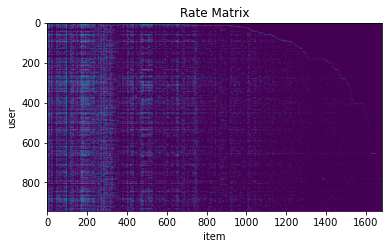

In [10]:
import matplotlib.pyplot as plt

plt.imshow(user_item_total)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

각 유저가 각 아이템들에 대해 어떻게 평점을 주었는지를 한 눈에 볼 수 있다.

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ndcg_score

#cluster용 dataset
SVD = TruncatedSVD(n_components=2) # 상위 n개의 특잇값을 추출해 n차원으로 생성 / 지금은 2차원

SVD 로 보지 않은 영화 평점을 예측하는 방법 : https://walwalgabu.tistory.com/entry/1-Numpy%EB%A7%8C-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-SVD-%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C%EC%9D%84-%EA%B0%84%EB%8B%A8%ED%9E%88-%EC%8B%A4%ED%97%98%ED%95%B4%EB%B3%B4%EC%9E%90Truncated-SVD  

특히 truncated SVD 는 그 SVD 를 통해 일궈낸 특이값들 중 상위 N 개만을 추출한 것을 의미한다.

In [34]:
full_rank_item_total = SVD.fit_transform(user_item_total)
full_rank_item_total = pd.DataFrame(full_rank_item_total)
full_rank_item_total

,0,1
0,42.156451,1.462856
1,8.982352,-11.415710
2,3.624693,-6.272333
3,3.839383,-5.067712
4,20.979029,2.242444
...,...,...
938,7.227809,-10.082025
939,19.223048,-2.063405
940,4.769211,-6.126077
941,15.395186,1.982231


In [40]:
SVD = TruncatedSVD(n_components=1681) # 상위 n개의 특잇값을 추출해 n차원으로 생성 / 지금은 2차원

full_rank_item_total = SVD.fit_transform(user_item_total)
full_rank_item_total = pd.DataFrame(full_rank_item_total)
full_rank_item_total

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,42.156451,1.462913,-1.335954,-13.424168,2.244718,2.503700,10.755068,-2.059667,6.114460,1.604512,...,-0.002294,0.007812,-0.000001,-0.002108,0.000497,-0.001547,0.000453,0.000717,0.002688,0.000580
1,8.982352,-11.415745,11.454040,2.591414,-2.447141,0.840269,2.267179,-0.709822,3.903893,-0.496068,...,0.019952,0.009960,-0.011742,-0.020930,0.022743,-0.016647,-0.005973,0.007588,0.001380,-0.000822
2,3.624693,-6.272327,5.089286,4.546089,6.970323,0.561626,0.574835,-0.306567,-2.386717,-0.703597,...,0.014705,0.011943,0.033004,-0.024739,0.008167,0.003127,0.007165,0.003607,-0.009055,0.000888
3,3.839383,-5.067744,2.712681,3.134781,3.973727,-1.766179,1.392855,-0.952671,-2.216310,0.807909,...,-0.013492,-0.022983,-0.030300,-0.017097,0.004533,-0.016223,-0.004495,0.010000,-0.004974,-0.017117
4,20.979029,2.242459,-10.049387,-2.292856,1.664097,-1.952189,12.074676,8.987850,-1.299121,2.273060,...,-0.002278,-0.001169,-0.002048,0.003365,-0.000474,0.001297,-0.004108,-0.000237,0.001136,-0.002941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,7.227809,-10.081987,1.192640,-0.329154,-9.233843,-1.720194,-3.822564,2.457907,2.171322,0.423224,...,-0.003146,0.009942,-0.000830,-0.012076,-0.002069,-0.008532,0.006900,0.007082,0.001984,-0.001794
939,19.223048,-2.063378,6.847339,3.033570,4.384436,-1.191564,5.269492,-4.602333,-0.558326,-0.659209,...,-0.007087,-0.001976,-0.009612,0.000635,0.004168,-0.007384,-0.001531,-0.006456,0.001787,-0.002145
940,4.769211,-6.126120,1.343093,-2.237854,-2.056353,-3.405224,2.666116,1.689144,-0.661766,-0.128317,...,0.069417,-0.009474,0.026199,0.004221,0.012712,-0.046093,-0.018117,0.018423,-0.002151,0.004355
941,15.395186,1.982223,4.985924,11.703419,1.581523,-5.621466,-1.112036,-1.752854,-1.890231,-2.956240,...,0.000626,0.010022,-0.000589,0.006080,-0.004429,-0.004845,-0.001702,-0.003108,0.001747,-0.003689


truncated SVD 로 두 개의 component(특잇값) 을 추출
이를 가지고 내적을 통해 다시 원래의 값을 반환

## NDCG

In [21]:
def groupRS_ndcg(num, total_matrix, train_matrix):
    total_matrix  # user_item_total 
    train_matrix  # user_item_train
    test_matrix = user_item_test
    
    
    ## 1. K-means로 그룹 clustering(total 대상)

    km = KMeans(n_clusters=num, init='k-means++')
    cluster = km.fit(total_matrix)
    cluster_id = pd.DataFrame(cluster.labels_) # 모든  user의 클러스터

    cluster_id.index = total_matrix.index
    cluster_id.rename(columns = {0 : 'cluster'}, inplace = True) # 모든  user의 클러스터
    
    length = [0]*num
    for i in range(num):
        length[i] = len(cluster_id[cluster_id.cluster==i]) # 각 클러스터에 해당하는 개수
    

    # train, test 에 cluster 정보 추가
    user_item_train_cl = pd.concat([train_matrix, cluster_id], axis=1, join='inner')
    user_item_test_cl = pd.concat([test_matrix, cluster_id], axis=1, join='inner')
    





    ## 2. 클러스터 별로 각 item의 mean 값 구함 (train 대상)
    mean_rating = pd.DataFrame(columns = user_item_train_cl.columns)
    mean_rating.set_index('cluster')
    
    
    for i in range(num):
        mean_rating = mean_rating.append(user_item_train_cl[user_item_train_cl.cluster == i].mean(axis=0), ignore_index=True)
    
    mean_rating = mean_rating.set_index('cluster')
    mean_rating
    



    ## 3. train-test set의 columns(item id) 맞추기 (miss matching 제거)
    for c in user_item_train_cl.columns:
        if c not in user_item_test_cl.columns:
            del mean_rating[c]
        
    for c in user_item_test_cl.columns:
        if c not in user_item_train_cl.columns:
            del user_item_test_cl[c] 
            
    y_pred = mean_rating 
    y_true = user_item_test_cl
    
    
    result = [0]*num # 결과값 저장 리스트
    



    
    ## 4. 각 결과 값에 nDCG 더해줌
    for idx in test_matrix.index:
        cluster_num = int(y_true.loc[idx].cluster)
        result[cluster_num] += ndcg_score([y_true.loc[idx][:-1]], [y_pred.loc[cluster_num]])
        #result[cluster] += ndcg_score([user_item_test_cl.loc[idx][:-1]], [mean_rating.loc[cluster]], k=4)
    
    ## 5. 최종적으로 각 nDCG값 / 각 cluster의 요소 개수
    for i in range(num):
        result[i] = result[i]/length[i]
    
    #print("cluster수:",len(length),"/ NDCG:",sum(result)/len(length))  
    print('%.5f'%(sum(result)/(len(length))))

In [22]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

cluster_num = range(2,51)
#cluster_num=[2]

for i in cluster_num:
    #reduced_total = SVD.fit_transform(user_item_total)
    #reduced_total = pd.DataFrame(reduced_total)
    #reduced_total.index = total_user_idx
    
    #user_item_train = pd.DataFrame(user_item_train)
    
    groupRS_ndcg(i, user_item_total, user_item_train)

0.26877
0.28747
0.30626
0.29690
0.29788
0.30478
0.32287
0.29685
0.30725
0.29940
0.31980
0.34286
0.32492
0.32972
0.33599
0.33888
0.29947
0.34001
0.33884
0.29082
0.32648
0.32060
0.32452
0.28555
0.30829
0.33501
0.29709
0.29591
0.34196
0.30566
0.32613
0.31717
0.31901
0.29534
0.32924
0.33567
0.32048
0.29248
0.30881
0.31015
0.32697
0.31575
0.33143
0.29987
0.35415
0.29983
0.30749
0.30829
0.29992


In [23]:
## precision & recall : binary (2.5 이상 1, 나머지 0)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def groupRS_pre_rec(num, total_matrix, train_matrix):
    total_matrix  # user_item_total 
    train_matrix  # user_item_train
    test_matrix = user_item_test
    
    
    ## 1. K-means로 그룹 clustering(total 대상)
    km = KMeans(n_clusters=num, init='k-means++')
    cluster = km.fit(total_matrix)
    cluster_id = pd.DataFrame(cluster.labels_) # 모든  user의 클러스터

    cluster_id.index = total_matrix.index
    cluster_id.rename(columns = {0 : 'cluster'}, inplace = True) # 모든  user의 클러스터
    
    length = [0]*num
    for i in range(num):
        length[i] = len(cluster_id[cluster_id.cluster==i]) # 각 클러스터에 해당하는 개수

    # train, test 에 cluster 정보 추가
    user_item_train_cl = pd.concat([train_matrix, cluster_id], axis=1, join='inner')
    user_item_test_cl = pd.concat([test_matrix, cluster_id], axis=1, join='inner')
    
    
    ## 2. 클러스터 별로 각 item의 mean 값 구함 (train 대상)
    mean_rating = pd.DataFrame(columns = user_item_train_cl.columns)
    mean_rating.set_index('cluster')
    
    for i in range(num):
        mean_rating = mean_rating.append(user_item_train_cl[user_item_train_cl.cluster == i].mean(axis=0), ignore_index=True)
    
    mean_rating = mean_rating.set_index('cluster')
    mean_rating
    
    
    ## 3. train-test set의 columns(item id) 맞추기 (miss matching 제거)
    for c in user_item_train_cl.columns:
        if c not in user_item_test_cl.columns:
            del mean_rating[c]
        
    for c in user_item_test_cl.columns:
        if c not in user_item_train_cl.columns:
            del user_item_test_cl[c] 
            
    y_pred = mean_rating 
    y_true = user_item_test_cl
    
    ## binary로 만들기 위해 2개의 분류로 생성
    y_pred[y_pred< 2.5] = 0
    y_pred[y_pred >= 2.5] = 1
    
    y_true[y_true< 2.5] = 0
    y_true[y_true >= 2.5] = 1
    
    pre_result = [0]*num # 결과값 저장 리스트
    rec_result = [0]*num
    
    ## 4. 각 결과 값에 precision, recall더해줌
    for idx in test_matrix.index:
        cluster_num = int(y_true.loc[idx].cluster)
        pre_result[cluster_num] += precision_score(list(y_true.loc[idx][:-1].values) ,list(y_pred.loc[cluster_num].values ), average = 'binary')
        rec_result[cluster_num] += recall_score(list(y_true.loc[idx][:-1].values) ,list(y_pred.loc[cluster_num].values ), average = 'binary')
    
    print(pre_result)
    print(rec_result)
    #print(sum(pre_result)/num)
    
    #print(sum(rec_result)/num)
    ## 5. 최종적으로 각 precision, recall값 / 각 cluster의 요소 개수
    #for i in range(num):
    #    result[i] = result[i]/length[i]

    
    #print("cluster수:",len(length),"/ NDCG:",sum(result)/len(length))  
    print('%.5f'%(sum(pre_result)/num), ", ",  '%.5f'%(sum(rec_result)/num))

In [24]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

cluster_num = range(2,31)
#cluster_num=[2]

for i in cluster_num:
    #reduced_total = SVD.fit_transform(user_item_total)
    #reduced_total = pd.DataFrame(reduced_total)
    #reduced_total.index = total_user_idx
    
    #user_item_train = pd.DataFrame(user_item_train)
    
    groupRS_pre_rec(i, user_item_total, user_item_train)

[0.0, 0]
[0.0, 0]
0.00000 ,  0.00000
[83.5, 0, 0]
[6.188595621403521, 0, 0]
27.83333 ,  2.06287
[48.099999999999945, 0.0, 0, 0]
[58.21009893633862, 0.0, 0, 0]
12.02500 ,  14.55252
[42.5, 33.846153846153804, 0, 0, 0]
[8.961068223715742, 30.51383311862477, 0, 0, 0]
15.26923 ,  7.89498
[0.0, 31.836363636363643, 0, 0, 0, 0]
[0.0, 39.81598149964606, 0, 0, 0, 0]
5.30606 ,  6.63600
[22.250000000000032, 34.0, 0, 0, 0, 0, 0]
[21.12491031814811, 1.2871803941353825, 0, 0, 0, 0, 0]
8.03571 ,  3.20173
[14.409090909090917, 55.400000000000105, 0, 0, 0, 0, 0, 0]
[13.43874436525986, 11.119365128679984, 0, 0, 0, 0, 0, 0]
8.72614 ,  3.06976
[29.100000000000016, 56.0, 0, 0, 0, 0, 0, 0, 0]
[9.957346303814557, 2.4919939951587113, 0, 0, 0, 0, 0, 0, 0]
9.45556 ,  1.38326
[0.0, 31.159999999999936, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, 19.23785554873005, 0, 0, 0, 0, 0, 0, 0, 0]
3.11600 ,  1.92379
[13.66666666666666, 38.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8.113554139870692, 1.3248415595945782, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4.69

In [25]:
## precision & recall : multiclass(반올림)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import math

def groupRS_pre_rec2(num, total_matrix, train_matrix):
    total_matrix  # user_item_total 
    train_matrix  # user_item_train
    test_matrix = user_item_test
    
    
    ## 1. K-means로 그룹 clustering(total 대상)
    km = KMeans(n_clusters=num, init='k-means++')
    cluster = km.fit(total_matrix)
    cluster_id = pd.DataFrame(cluster.labels_) # 모든  user의 클러스터

    cluster_id.index = total_matrix.index
    cluster_id.rename(columns = {0 : 'cluster'}, inplace = True) # 모든  user의 클러스터
    
    length = [0]*num
    for i in range(num):
        length[i] = len(cluster_id[cluster_id.cluster==i]) # 각 클러스터에 해당하는 개수

    # train, test 에 cluster 정보 추가
    user_item_train_cl = pd.concat([train_matrix, cluster_id], axis=1, join='inner')
    user_item_test_cl = pd.concat([test_matrix, cluster_id], axis=1, join='inner')
    
    
    ## 2. 클러스터 별로 각 item의 mean 값 구함 (train 대상)
    mean_rating = pd.DataFrame(columns = user_item_train_cl.columns)
    mean_rating.set_index('cluster')
    
    for i in range(num):
        mean_rating = mean_rating.append(user_item_train_cl[user_item_train_cl.cluster == i].mean(axis=0), ignore_index=True)
    
    mean_rating = mean_rating.set_index('cluster')
    mean_rating
    
    ## multiuclass 1~5점으로 반올림하여 다중 분류 생성
    for i in mean_rating.index:
        for j in mean_rating.columns:
             mean_rating.loc[i][j] = round(mean_rating.loc[i][j])

    user_item_test_cl = user_item_test_cl.round(0)
    

    ## 3. train-test set의 columns(item id) 맞추기 (miss matching 제거)
    for c in user_item_train_cl.columns:
        if c not in user_item_test_cl.columns:
            del mean_rating[c]
        
    for c in user_item_test_cl.columns:
        if c not in user_item_train_cl.columns:
            del user_item_test_cl[c] 
            
    y_pred = mean_rating 
    y_true = user_item_test_cl
    
    
    pre_result = [0]*num # 결과값 저장 리스트
    rec_result = [0]*num
    
    ## 4. 각 결과 값에 nDCG 더해줌
    for idx in test_matrix.index:
        cluster_num = int(y_true.loc[idx].cluster)
        pre_result[cluster_num] += precision_score(list(y_true.loc[idx][:-1].values) ,list(y_pred.loc[cluster_num].values ), average = 'macro')
        rec_result[cluster_num] += recall_score(list(y_true.loc[idx][:-1].values) ,list(y_pred.loc[cluster_num].values ), average = 'macro')
    
    print(pre_result)
    print(rec_result)
    #print(sum(pre_result)/num)
    
    #print(sum(rec_result)/num)
    ## 5. 최종적으로 각 precision, recall값 / 각 cluster의 요소 개수
    #for i in range(num):
    #    result[i] = result[i]/length[i]

    
    #print("cluster수:",len(length),"/ NDCG:",sum(result)/len(length))  
    print('%.5f'%(sum(pre_result)/num), ", ",  '%.5f'%(sum(rec_result)/num))

In [26]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

cluster_num = range(2,31)
#cluster_num=[2]

for i in cluster_num:
    #reduced_total = SVD.fit_transform(user_item_total)
    #reduced_total = pd.DataFrame(reduced_total)
    #reduced_total.index = total_user_idx
    
    #user_item_train = pd.DataFrame(user_item_train)
    
    groupRS_pre_rec2(i, user_item_total, user_item_train)

[26.648254764559113, 53.51832913719378]
[29.16322544764736, 56.06715694210131]
40.08329 ,  42.61519
[45.342621684601866, 21.91799567350174, 14.543358408169585]
[47.50794531709458, 23.90785094102233, 14.113544564426824]
27.26799 ,  28.50978
[19.97162242548278, 44.70255236192564, 9.492550939068396, 7.747905263638022]
[21.965960151654173, 46.86904744054555, 10.085381813708347, 7.4913701863737305]
20.47866 ,  21.60294
[7.747905263638022, 13.055853123213346, 33.048720187829474, 9.492550939068396, 19.14266577679049]
[7.4913701863737305, 15.34362568082785, 34.2585148173619, 10.085381813708347, 20.67276362932458]
16.49754 ,  17.57033
[13.794373953652293, 6.140231341218875, 13.55817032501908, 31.5488764044944, 11.804948193272935, 6.390321659577537]
[16.028968063000352, 7.04895190104157, 14.1565957028652, 32.87071932521023, 12.088443440823738, 6.32377873387311]
13.87282 ,  14.75291
[17.91588432984379, 6.618136353471958, 14.265387973195777, 9.02599605692279, 5.744657364598521, 9.834082621521315, 

y_true = [0, 1, 2, 0, 1, 2] y_pred = [0, 2, 1, 0, 0, 1]

y_true: target의 실제 값 (여기서는 test 값)

y_pred: 분류된 예상값 (여기서는 mean rating(train 값))